Análise de dados de fatura de cartão de crédito
- logica
* instalar, ler e usar as bibliotecas
* ler a fatura e organiza-la (fatura.csv)
* iniciar o processo de analise
* gerar as informações relevantes

Instalar as libs
- pandas        - pip install pandas
- matplotlibs   - pip install matplotlibs

Usar as libs

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# dados = pd.read_csv('fatura.csv')
# print(dados)

Ler a base e organiza-la

In [146]:
dados = pd.read_csv('fatura.csv')

Iniciar o processo de análise

* Valor total da Fatura

In [147]:
valor_total_cartao = dados["ValorCompra"].sum()  # .sum() função de soma

print(f"O valor total da Fatura é: R${valor_total_cartao}")

O valor total da Fatura é: R$14811.75


* Valor gasto por titular/pessoa

In [148]:
valor_gasto_pessoa = dados.groupby('Nome')['ValorCompra'].sum().reset_index().sort_values(by='ValorCompra', ascending=False)
print(valor_gasto_pessoa)

     Nome  ValorCompra
0     Ana      5763.10
1  Carlos      3701.59
3   Maria      2784.91
2    Joao      2562.15


* Valor gasto por categoria

In [149]:
valor_gasto_categoria = dados.groupby('categoria')['ValorCompra'].sum().reset_index().sort_values(by='ValorCompra')
valor_gasto_categoria

,categoria,ValorCompra
3,Lazer,972.30
4,Mercado,1495.00
2,Farmácia,1714.60
6,Vestuário,1739.94
7,Viagem,1893.79
5,Transporte,2186.05
1,Eletrônicos,2350.01
0,Alimentação,2460.06


* Gastos por dia

In [150]:
gastos_por_dias = dados.groupby('data_compra')['ValorCompra'].sum().reset_index().sort_values(by='data_compra',ascending=False)
# gastos_por_dias

* Gráficos dos Gastos por pessoa

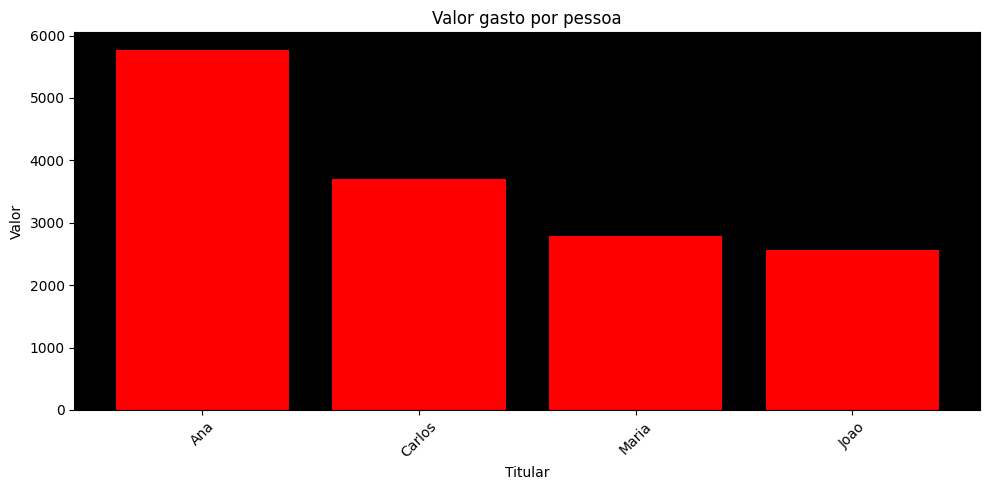

In [151]:
# matplotlib.pyplot as plt

plt.figure(figsize=(10,5))   # facecolor='black'

ax = plt.gca()  # Obtém o eixo atual
ax.set_facecolor('black')  # Define o fundo do eixo (área do gráfico) como preto

plt.bar(valor_gasto_pessoa['Nome'], valor_gasto_pessoa['ValorCompra'], color='red')
plt.title("Valor gasto por pessoa")
plt.xlabel('Titular')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# valor_gasto_pessoa

* Gráfico de gastos por categoria

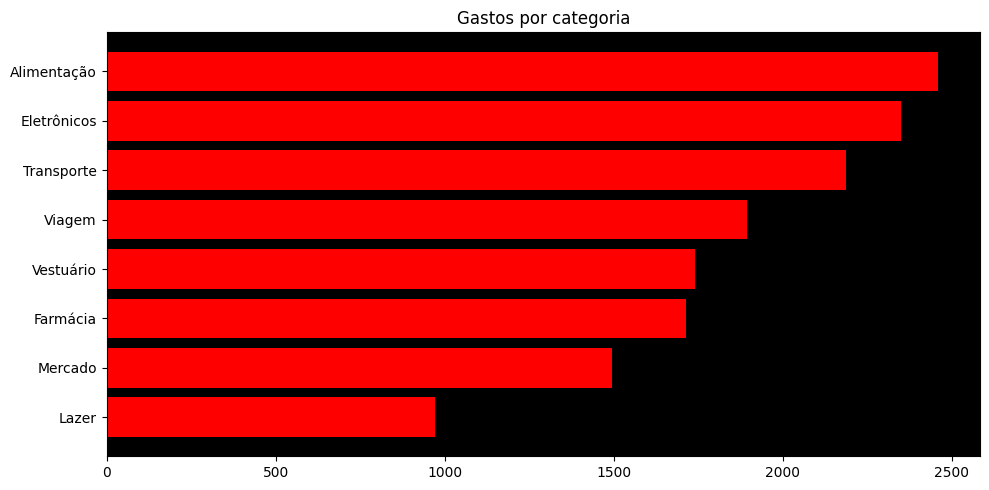

In [152]:
plt.figure(figsize=(10,5))
plt.barh(valor_gasto_categoria['categoria'], valor_gasto_categoria['ValorCompra'], color='red')

ax = plt.gca()  # Obtém o eixo atual
ax.set_facecolor('black')  # Define o fundo do eixo (área do gráfico) como preto

plt.title("Gastos por categoria")
plt.tight_layout()

plt.show()

# valor_gasto_categoria

* Gráficos dos gastos por titular - (PIZZA)

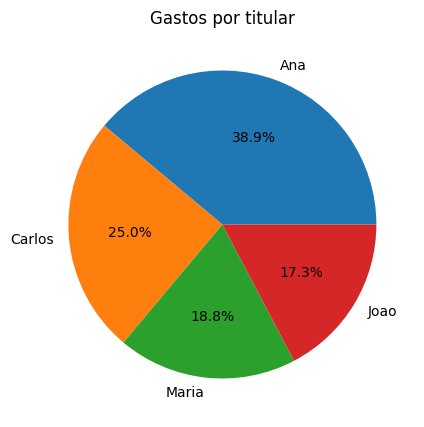

In [153]:
plt.figure(figsize=(5,5))
plt.pie(valor_gasto_pessoa['ValorCompra'], 
        labels=valor_gasto_pessoa['Nome'],
        autopct='%1.1f%%'
)
plt.title("Gastos por titular")
plt.show()

* Gastos por dia ao longo do tempo

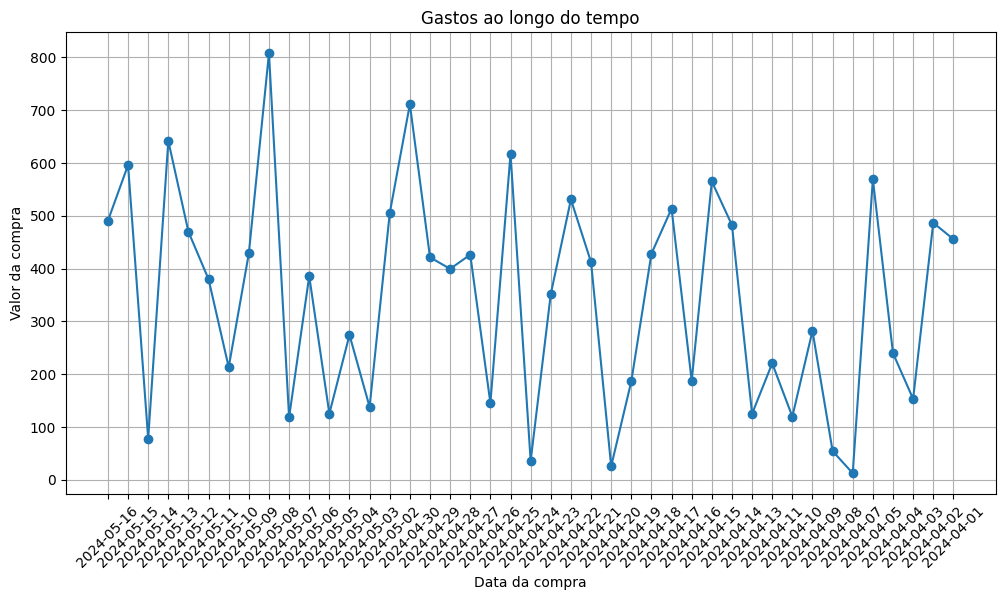

In [154]:
plt.figure(figsize=(12,6))
plt.plot(gastos_por_dias['data_compra'], gastos_por_dias['ValorCompra'], marker='o')

plt.title('Gastos ao longo do tempo')
plt.xlabel('Data da compra')
plt.ylabel('Valor da compra')

plt.xticks(rotation=45)

plt.grid(True)
plt.show()